In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [2]:
class BHBHdatset(torch.utils.data.Dataset):
    def __init__(self, df, input_cols, target_cols, scale_data=True):
        self.X = torch.from_numpy(df[input_cols].values)
        self.y = torch.from_numpy(df[target_cols].values)
            
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, i):
        return self.X[i], self.y[i]

In [3]:
# torch.manual_seed(42)
bhbh = pd.read_csv('BHBH.csv')
bhbh = bhbh.fillna(0)
bhbh['q'] = bhbh.apply(lambda x: x['Mass_0_out']/x['Mass_1_out'] if (x['Mass_1_out'] > x['Mass_0_out']) else x['Mass_1_out']/x['Mass_0_out'], axis=1)

In [4]:
data =bhbh
dataset = BHBHdatset(data,
                     ['Mass_0', 'Z_0', 'Mass_1', 'Z_1', 'a', 'e'],
                     ['q'])
trainloader = torch.utils.data.DataLoader(dataset,
                                          batch_size=500,
                                          shuffle=True)

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.in1 = nn.Linear(6,4)
        self.in2 = nn.Linear(6,4)
        self.in3 = nn.Linear(6,4)
        # self.in4 = nn.Linear(6,4)

        self.lin1_1 = nn.Linear(4,4)
        self.lin1_2 = nn.Linear(4,4)
        self.lin1_3 = nn.Linear(4,4)
        # self.lin1_4 = nn.Linear(4,4)
        
        
        # self.out1 = nn.Linear(12,4)
        # self.out2 = nn.Linear(4,1)
        
        self.out = nn.Linear(12,1)

    # x represents our data
    def forward(self, x):
        x1 = self.in1(x)
        x1 = torch.relu(x1)
        
        x1 = self.lin1_1(x1)
        x1 = torch.relu(x1)
        
        x2 = self.in2(x)
        x2 = torch.relu(x2)
        
        x2 = self.lin1_2(x2)
        x2 = torch.relu(x2)
        
        x3 = self.in3(x)
        x3 = torch.relu(x3)
        
        x3 = self.lin1_3(x3)
        x3 = torch.relu(x3)
        
#         x4 = self.in4(x)
#         x4 = torch.relu(x4)
        
#         x4 = self.lin1_4(x4)
#         x4 = torch.relu(x4)
        
        
        output = torch.concat((x1, x2, x3), axis=1)
        output = self.out(output)
        output = torch.sigmoid(output)
        
#         output = torch.concat((x1, x2, x3), axis=1)
#         output = self.out1(output)
#         output = torch.relu(output)
        
#         output = self.out2(output)
#         output = torch.sigmoid(output)
        
        
        return output

In [6]:
net = Net()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-4)

In [7]:
# Run the training loop
for epoch in range(0, 5): # 5 epochs at maximum

# Print epoch
    print(f'Starting epoch {epoch+1}')

    # Set current loss value
    current_loss = 0.0

    # Iterate over the DataLoader for training data
    for i, data in enumerate(trainloader, 0):

        # Get and prepare inputs
        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()
        targets = targets.reshape((targets.shape[0], 1))

        # Zero the gradients
        optimizer.zero_grad()

        # Perform forward pass
        outputs = net(inputs)

        # Compute loss
        loss = loss_function(outputs, targets)

        # Perform backward pass
        loss.backward()

        # Perform optimization
        optimizer.step()

        # Print statistics
        current_loss += loss.item()

        if i % 10 == 0:
            print('Loss after mini-batch %5d: %.3f' %(i + 1, current_loss / 500))
            current_loss = 0.0
    # Process is complete.
    print('Training process has finished.')       

Starting epoch 1
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.002
Loss after mini-batch    21: 0.002
Loss after mini-batch    31: 0.002
Loss after mini-batch    41: 0.002
Loss after mini-batch    51: 0.002
Loss after mini-batch    61: 0.002
Loss after mini-batch    71: 0.002
Loss after mini-batch    81: 0.002
Loss after mini-batch    91: 0.002
Loss after mini-batch   101: 0.002
Loss after mini-batch   111: 0.002
Loss after mini-batch   121: 0.001
Loss after mini-batch   131: 0.001
Loss after mini-batch   141: 0.001
Loss after mini-batch   151: 0.001
Loss after mini-batch   161: 0.001
Training process has finished.
Starting epoch 2
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.001
Loss after mini-batch    21: 0.001
Loss after mini-batch    31: 0.001
Loss after mini-batch    41: 0.001
Loss after mini-batch    51: 0.001
Loss after mini-batch    61: 0.001
Loss after mini-batch    71: 0.001
Loss after mini-batch    81: 0.001
Loss after mini-batch    

In [8]:
net.eval()

Net(
  (in1): Linear(in_features=6, out_features=4, bias=True)
  (in2): Linear(in_features=6, out_features=4, bias=True)
  (in3): Linear(in_features=6, out_features=4, bias=True)
  (lin1_1): Linear(in_features=4, out_features=4, bias=True)
  (lin1_2): Linear(in_features=4, out_features=4, bias=True)
  (lin1_3): Linear(in_features=4, out_features=4, bias=True)
  (out): Linear(in_features=12, out_features=1, bias=True)
)

In [9]:
import matplotlib.pyplot as plt

In [10]:
input_cols = ['Mass_0', 'Z_0', 'Mass_1', 'Z_1', 'a', 'e']
target_cols = ['q']
X = torch.from_numpy(bhbh[input_cols].values)
y = torch.from_numpy(bhbh[target_cols].values)
y_test = net(X.float()).detach().numpy()

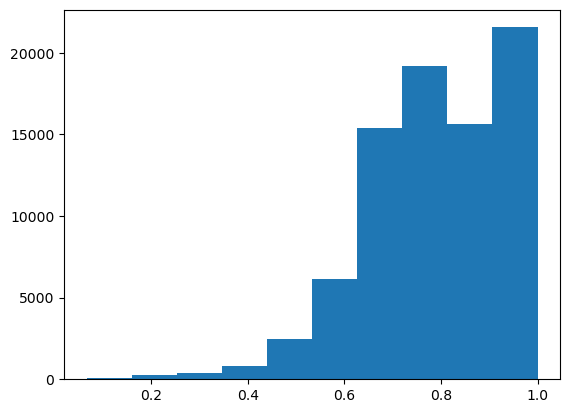

In [11]:
plt.hist(y_test);

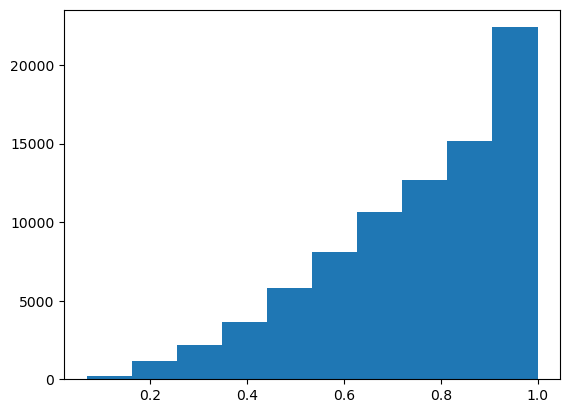

In [12]:
plt.hist(bhbh['q'].values);